In [74]:

# a) Load libraries
# standard imports
import os

# Third Party Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Data Science/student_habits_performance.csv')

In [3]:
df.shape

(1000, 16)

In [4]:
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [10]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

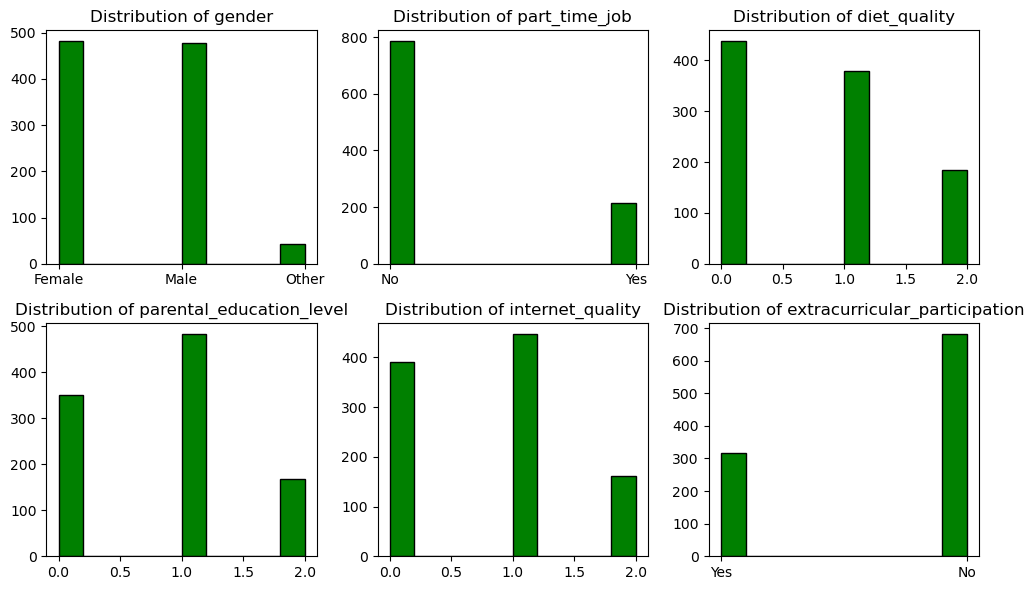

In [28]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[cat_col[i]], color='green', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [12]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

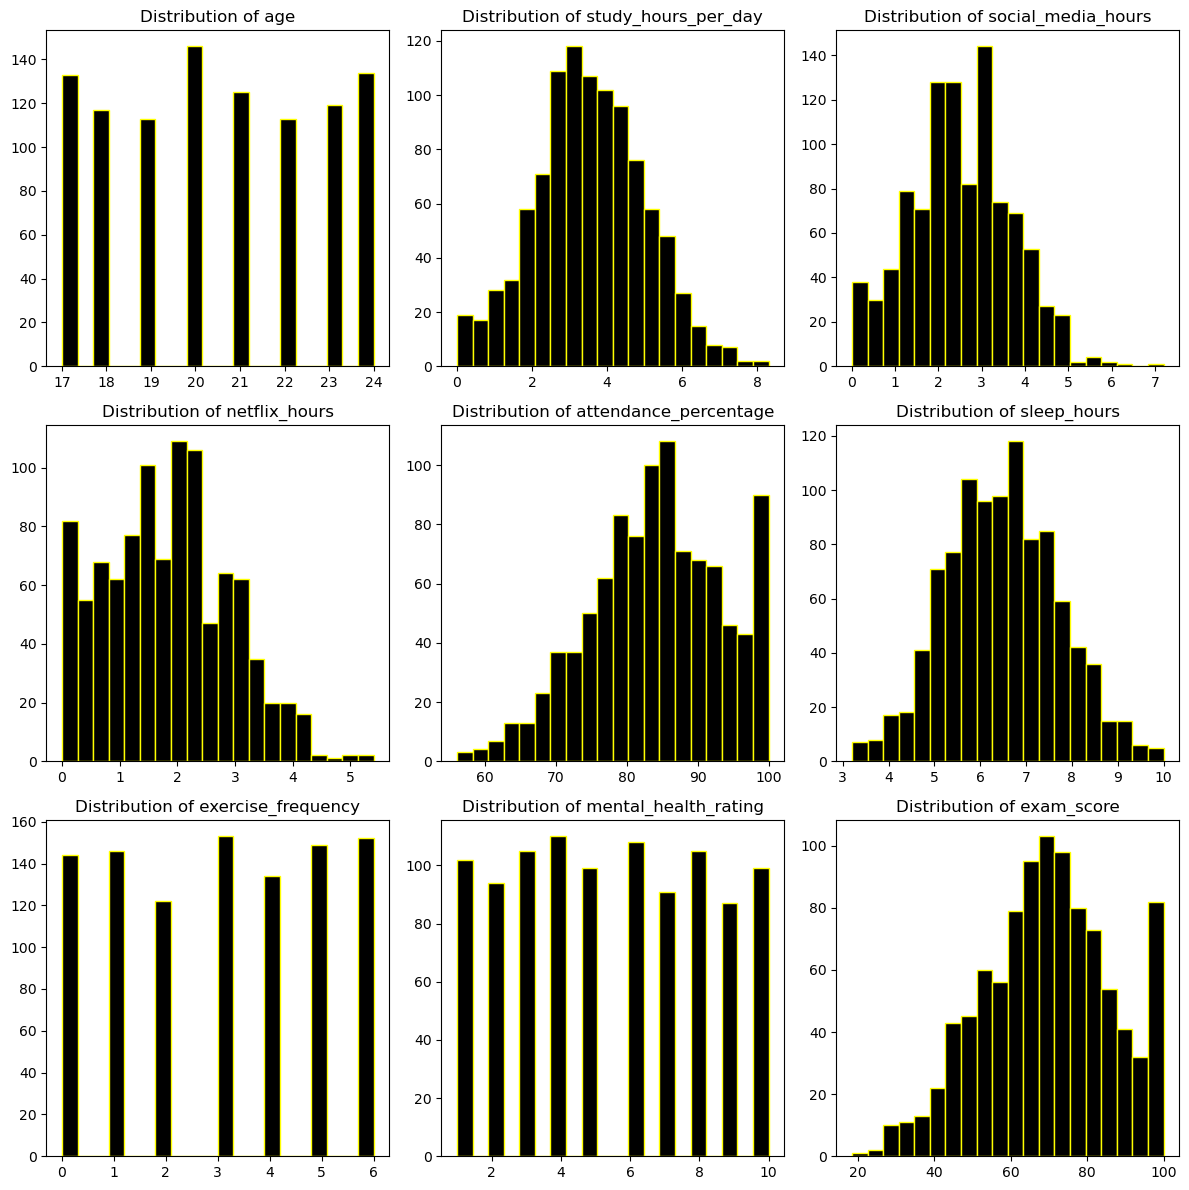

In [30]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]], bins = 20, color='black', edgecolor='yellow')
    plt.title(f'Distribution of {num_col[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [14]:
df2 = df.drop('student_id', axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [45]:
for col in cat_col:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [47]:
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['iq_e'] = df2['internet_quality'].map(internet_quality)

In [48]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


In [49]:
df3 = pd.concat([df2,dummies], axis=1)

In [50]:
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

<Axes: >

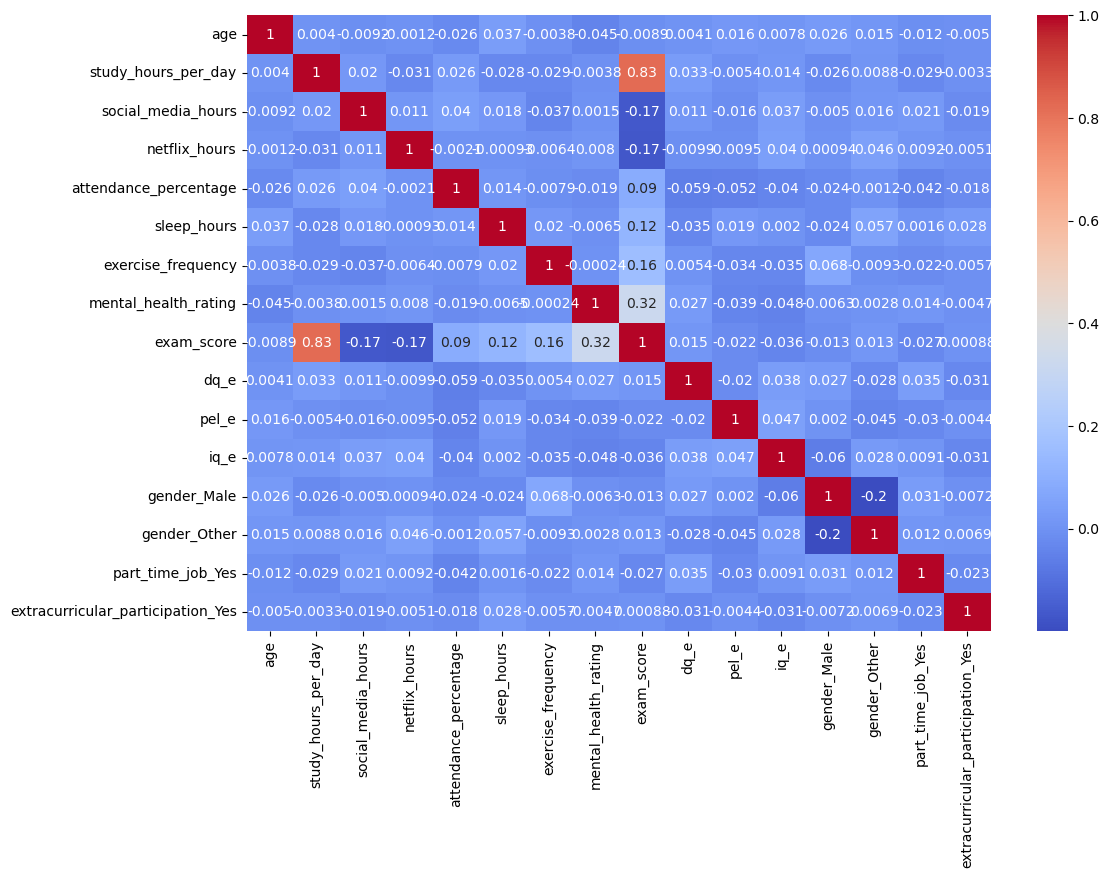

In [51]:
plt.figure(figsize = (12, 8))
corr = df3.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

In [52]:
df4 = df3

In [56]:
df4.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


In [64]:
target_variable = df4['exam_score']
feature_names = df4.drop('exam_score', axis=1)


# --- Data Splitting by specifying the input and output---
X = feature_names
y = target_variable

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8988342264221522

In [77]:
# Try multiple models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.3f}, RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear → R²: 0.899, RMSE: 5.09
Ridge → R²: 0.899, RMSE: 5.09
Lasso → R²: 0.898, RMSE: 5.10
Random Forest → R²: 0.810, RMSE: 6.98


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
